# Student Depression Prediction

For this project I will use the steps in CRISP-DM, or Cross-Industry Standard Process for Data Mining. It is a widely-used framework for guiding data mining projects from start to finish.

## Step 1: Business Understanding

We are given a dataset of students and a bunch of their data, such as their age, gender, sleep duration, etc. Our goal is to identify factors contributing to student depression, to possibly give depressed students help early in their depression, and to design early intervention strategies.

We want to check if a new student is expected to be depressed (target == 1) based on their attributes, or if they are not expected to be depressed (target == 0).

## Step 2: Data Understanding

In [1080]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [1081]:
df = pd.read_csv("Student Depression Dataset.csv")

In [1082]:
df.shape

(27901, 18)

The dataset has about 28k students, that should be enough to make a good model.

In [1083]:
df.head().T

,0,1,2,3,4
id,2,8,26,30,32
Gender,Male,Female,Male,Female,Female
Age,33.0,24.0,31.0,28.0,25.0
City,Visakhapatnam,Bangalore,Srinagar,Varanasi,Jaipur
Profession,Student,Student,Student,Student,Student
Academic Pressure,5.0,2.0,3.0,3.0,4.0
Work Pressure,0.0,0.0,0.0,0.0,0.0
CGPA,8.97,5.9,7.03,5.59,8.13
Study Satisfaction,2.0,5.0,5.0,2.0,3.0
Job Satisfaction,0.0,0.0,0.0,0.0,0.0


The small smaple we got from looking at the head of the dataset looks good and there aren't any empty values, but we should still clean up the column and value names so they are easier to work with during our analysis. Our target is Depression (we will change this column name later).

In [1084]:
df.Depression.value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [1085]:
sum(df["Depression"]) / len(df)

0.5854987276441704

About 59% of the students in the dataset are depressed, slightly imbalanced but nothing that will make it difficult for us to make a good model.

In [1086]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

There is very little missing data, this is great since every student has plenty of data.

## Step 3: Data Preparation

Now we can start cleaning up the dataframe so it's easier to work with, and give us more accurate results.

First, let's clean up the column names and values so that they're easier to read.

In [1087]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
string_columns = list(df.dtypes[df.dtypes == "object"].index)
for column in string_columns:
    df[column] = df[column].str.lower().str.replace(" ", "_")

Let's look at the dataframe now.

In [1088]:
df.head().T

,0,1,2,3,4
id,2,8,26,30,32
gender,male,female,male,female,female
age,33.0,24.0,31.0,28.0,25.0
city,visakhapatnam,bangalore,srinagar,varanasi,jaipur
profession,student,student,student,student,student
academic_pressure,5.0,2.0,3.0,3.0,4.0
work_pressure,0.0,0.0,0.0,0.0,0.0
cgpa,8.97,5.9,7.03,5.59,8.13
study_satisfaction,2.0,5.0,5.0,2.0,3.0
job_satisfaction,0.0,0.0,0.0,0.0,0.0


The column names and values are a lot easier to work with now.

In [1089]:
from IPython.display import display

def display_column_value_counts(df):
    for column in df.columns:
        display(df[column].value_counts().sort_index())
        print("\n")

In [1090]:
display_column_value_counts(df)

id
2         1
8         1
26        1
30        1
32        1
         ..
140685    1
140686    1
140689    1
140690    1
140699    1
Name: count, Length: 27901, dtype: int64

gender
female    12354
male      15547
Name: count, dtype: int64

age
18.0    1587
19.0    1560
20.0    2237
21.0    1726
22.0    1160
23.0    1645
24.0    2258
25.0    1784
26.0    1155
27.0    1462
28.0    2133
29.0    1950
30.0    1145
31.0    1427
32.0    1262
33.0    1893
34.0    1468
35.0      10
36.0       7
37.0       2
38.0       8
39.0       3
41.0       1
42.0       4
43.0       2
44.0       1
46.0       2
48.0       3
49.0       1
51.0       1
54.0       1
56.0       1
58.0       1
59.0       1
Name: count, dtype: int64

city
3.0                      1
agra                  1094
ahmedabad              951
bangalore              767
bhavna                   2
bhopal                 934
chennai                885
city                     2
delhi                  768
faridabad              461
gaurav                   1
ghaziabad              745
harsh                    1
harsha                   2
hyderabad             1340
indore                 643
jaipur                1036
kalyan                1570
kanpur                 609
khaziabad                1
kibara                   1
kolkata               1066
less_delhi               1
less_than_5_kalyan       1
lucknow               1155
ludhiana              1111
m.com                    1
m.tech                   1
me                       1
meerut                 825
mihir                    1
mira                     1
mumbai                 699
nagpur                 651
nalini                   1
nalyan                   1
nandini                

profession
architect                     8
chef                          2
civil_engineer                1
content_writer                2
digital_marketer              3
doctor                        2
educational_consultant        1
entrepreneur                  1
lawyer                        1
manager                       1
pharmacist                    2
student                   27870
teacher                       6
ux/ui_designer                1
Name: count, dtype: int64

academic_pressure
0.0       9
1.0    4801
2.0    4178
3.0    7462
4.0    5155
5.0    6296
Name: count, dtype: int64

work_pressure
0.0    27898
2.0        1
5.0        2
Name: count, dtype: int64

cgpa
0.00       9
5.03      17
5.06      15
5.08      95
5.09      20
        ... 
9.95     133
9.96     425
9.97     139
9.98      59
10.00     58
Name: count, Length: 332, dtype: int64

study_satisfaction
0.0      10
1.0    5451
2.0    5838
3.0    5821
4.0    6359
5.0    4422
Name: count, dtype: int64

job_satisfaction
0.0    27893
1.0        2
2.0        3
3.0        1
4.0        2
Name: count, dtype: int64

sleep_duration
5-6_hours            6183
7-8_hours            7346
less_than_5_hours    8310
more_than_8_hours    6044
others                 18
Name: count, dtype: int64

dietary_habits
healthy       7651
moderate      9921
others          12
unhealthy    10317
Name: count, dtype: int64

degree
b.arch      1478
b.com       1506
b.ed        1867
b.pharm      810
b.tech      1152
ba           600
bba          696
bca         1433
be           613
bhm          925
bsc          888
class_12    6080
llb          671
llm          482
m.com        734
m.ed         821
m.pharm      582
m.tech      1022
ma           544
mba          562
mbbs         696
mca         1044
md           572
me           185
mhm          191
msc         1190
others        35
phd          522
Name: count, dtype: int64

have_you_ever_had_suicidal_thoughts_?
no     10245
yes    17656
Name: count, dtype: int64

work/study_hours
0.0     1700
1.0     1150
2.0     1590
3.0     1470
4.0     1614
5.0     1296
6.0     2247
7.0     2001
8.0     2509
9.0     2026
10.0    4234
11.0    2892
12.0    3172
Name: count, dtype: int64

financial_stress
1.0    5121
2.0    5061
3.0    5226
4.0    5775
5.0    6715
Name: count, dtype: int64

family_history_of_mental_illness
no     14398
yes    13503
Name: count, dtype: int64

depression
0    11565
1    16336
Name: count, dtype: int64

Looking at the value counts for the values of each column we can make some assumptions:

- the id column does nothing, so we can remove it
- people with ages over 34 can be removed from the dataset due to low counts
- people with a city that has a count under 400 can be removed due to low counts
- people with a profession that isn't student can be removed since this analysis is on students and the other professions have low counts
- drop the profession column once it only has students
- people with an academic_pressure that's 0 can be removed due to low counts
- people with a work_pressure aside from 0 can be removed due to low counts
- drop the work_pressure column since it only has values of 0
- people with a study_satisfaction that's 0 can be removed due to low counts
- people with a job_satisfaction aside from 0 can be removed due to low counts
- drop the job_satisfaction column since it only has values of 0
- people with a sleep_duration of "others" can be removed due to low counts, and the other options taking care of every possible option of sleep_duration
- people with a dietary_habits of "others" can be removed due to low counts, and the other options taking care of every possible option of dietary_habits
- people with a degree of "others" can be removed since it can be any degree and has low counts

In [1091]:
df = df.drop("id", axis=1)
df = df[df["age"] <= 34]
df = df[df["city"].map(df["city"].value_counts() >= 400)]
df = df[df["profession"] == "student"]
df = df.drop("profession", axis=1)
df = df[df["academic_pressure"] >= 1]
df = df[df["work_pressure"] == 0]
df = df.drop("work_pressure", axis=1)
df = df[df["study_satisfaction"] >= 1]
df = df[df["job_satisfaction"] == 0]
df = df.drop("job_satisfaction", axis=1)
df = df[df["sleep_duration"] != "others"]
df = df[df["dietary_habits"] != "others"]
df = df[df["degree"] != "others"]

In [1092]:
df.shape

(27718, 14)

We ended up getting rid of about 200 people that were not going to positively contribute to the dataset, let's look at the counts of the values in each column to see if we forgot anything.

In [1093]:
display_column_value_counts(df)

gender
female    12265
male      15453
Name: count, dtype: int64

age
18.0    1580
19.0    1559
20.0    2229
21.0    1716
22.0    1156
23.0    1633
24.0    2251
25.0    1776
26.0    1150
27.0    1454
28.0    2121
29.0    1936
30.0    1136
31.0    1418
32.0    1252
33.0    1889
34.0    1462
Name: count, dtype: int64

city
agra             1087
ahmedabad         942
bangalore         763
bhopal            928
chennai           882
delhi             764
faridabad         458
ghaziabad         739
hyderabad        1335
indore            642
jaipur           1033
kalyan           1559
kanpur            605
kolkata          1056
lucknow          1150
ludhiana         1104
meerut            817
mumbai            693
nagpur            646
nashik            544
patna             998
pune              966
rajkot            809
srinagar         1364
surat            1076
thane            1138
vadodara          689
varanasi          683
vasai-virar      1285
visakhapatnam     963
Name: count, dtype: int64

academic_pressure
1.0    4774
2.0    4152
3.0    7408
4.0    5129
5.0    6255
Name: count, dtype: int64

cgpa
0.00       2
5.03      17
5.06      15
5.08      94
5.09      20
        ... 
9.95     132
9.96     422
9.97     139
9.98      58
10.00     58
Name: count, Length: 331, dtype: int64

study_satisfaction
1.0    5414
2.0    5809
3.0    5782
4.0    6322
5.0    4391
Name: count, dtype: int64

sleep_duration
5-6_hours            6144
7-8_hours            7299
less_than_5_hours    8263
more_than_8_hours    6012
Name: count, dtype: int64

dietary_habits
healthy       7606
moderate      9858
unhealthy    10254
Name: count, dtype: int64

degree
b.arch      1473
b.com       1500
b.ed        1857
b.pharm      808
b.tech      1151
ba           594
bba          695
bca         1429
be           608
bhm          920
bsc          879
class_12    6054
llb          668
llm          480
m.com        730
m.ed         815
m.pharm      578
m.tech      1018
ma           542
mba          560
mbbs         689
mca         1035
md           566
me           184
mhm          191
msc         1181
phd          513
Name: count, dtype: int64

have_you_ever_had_suicidal_thoughts_?
no     10171
yes    17547
Name: count, dtype: int64

work/study_hours
0.0     1686
1.0     1140
2.0     1568
3.0     1456
4.0     1599
5.0     1283
6.0     2238
7.0     1989
8.0     2498
9.0     2015
10.0    4214
11.0    2879
12.0    3153
Name: count, dtype: int64

financial_stress
1.0    5085
2.0    5036
3.0    5194
4.0    5737
5.0    6663
Name: count, dtype: int64

family_history_of_mental_illness
no     14304
yes    13414
Name: count, dtype: int64

depression
0    11483
1    16235
Name: count, dtype: int64

It looks good for the most part but the cgpa column might have some outliers, let's look at it with a histogram.

<Axes: xlabel='cgpa', ylabel='Count'>

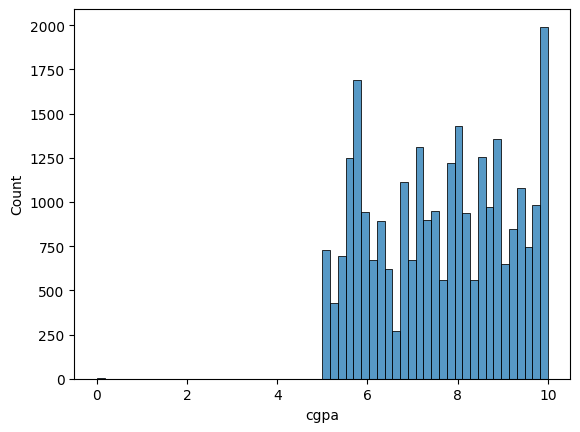

In [1094]:
sns.histplot(df["cgpa"])

We can see that below a cgpa of 5, there is a little bump at cgpa == 0 where the 2 outliers are, let's remove them from the table.

In [1095]:
df = df[df["cgpa"] >= 5]

Next let's see if there are any empty values in the dataframe.

In [1096]:
df.isnull().sum()

gender                                   0
age                                      0
city                                     0
academic_pressure                        0
cgpa                                     0
study_satisfaction                       0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         3
family_history_of_mental_illness         0
depression                               0
dtype: int64

The financial_stress column has 3 rows without values, so let's get rid of the, since it's such a small number.

In [1097]:
df = df.dropna(subset=["financial_stress"])

Now that the data is cleaned up, we can clean up the actual values in the columns. This part is not necessary since we are just making some float values into integer values, but it's nice to not have any unnecessary data.

In [1098]:
df.dtypes

gender                                    object
age                                      float64
city                                      object
academic_pressure                        float64
cgpa                                     float64
study_satisfaction                       float64
sleep_duration                            object
dietary_habits                            object
degree                                    object
have_you_ever_had_suicidal_thoughts_?     object
work/study_hours                         float64
financial_stress                         float64
family_history_of_mental_illness          object
depression                                 int64
dtype: object

The cgpa column is the only float column that uses actual floats, the rest use integers, let's change the column data types to integers.

In [1099]:
float_columns = list(df.dtypes[df.dtypes == "float"].index)
float_columns.remove("cgpa")

In [1100]:
for column in float_columns:
    df[column] = df[column].astype(int)

The have_you_ever_had_suicidal_thoughts_? and family_history_of_mental_illness columns are objects, but they are easier to work with as integers. Let's change each "no" to a 0, and each "yes" to a 1.

In [1101]:
df[["have_you_ever_had_suicidal_thoughts_?", "family_history_of_mental_illness"]] = (df[["have_you_ever_had_suicidal_thoughts_?", "family_history_of_mental_illness"]] == "yes").astype(int)

Now the dataframe is cleaned up and ready for us to start our modeling.

## Step 4: Modeling

Let's break up the dataframe into train, test, and validation.

To avoid accidentally using the target variable later, let's remove it from the dataframes:

In [1102]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train["depression"].values
y_val = df_val["depression"].values

del df_train["depression"]
del df_val["depression"]

Removing the target variable is an optional step, but it's helpful to make sure that we don't use it when training a model. If that happens, we'd use depression for predicting the depression, and our model would have perfect accuracy.

In [1103]:
len(df), round(len(df_train) / len(df), 3), round(len(df_test) / len(df), 3), round(len(df_val) / len(df), 3)

(27713, 0.6, 0.2, 0.2)

The dataframe got split into train (60%), test (20%), and validation (20%).

Now, we can use encoding methods to see which features may be important for our model.

We can't just take a categorical variable and put it into a machine learning model, since models can only work with numbers in matrices. Let's convert the categorical values into a matrix form by encoding them.

In [1104]:
categorical = ["gender", "city", "sleep_duration", "dietary_habits", "degree"]
numerical = ["age", "academic_pressure", "cgpa", "study_satisfaction",
             "have_you_ever_had_suicidal_thoughts_?", "work/study_hours",
             "financial_stress", "family_history_of_mental_illness"]

Let's calculate the depression rate for the categorical variables.

In [1105]:
global_mean = df_train_full["depression"].mean()

for col in categorical:
    df_group = df_train_full.groupby(by=col)["depression"].agg(["mean"])
    df_group["diff"] = df_group["mean"] - global_mean
    df_group["risk"] = df_group["mean"] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.584821,-0.002549,0.99566
male,0.589391,0.002021,1.00344


,mean,diff,risk
city,,,
agra,0.536928,-0.050442,0.914123
ahmedabad,0.679637,0.092267,1.157084
bangalore,0.599018,0.011648,1.019830
bhopal,0.626667,0.039296,1.066902
chennai,0.586987,-0.000383,0.999348
delhi,0.603839,0.016469,1.028039
faridabad,0.576087,-0.011283,0.980790
ghaziabad,0.570690,-0.016681,0.971601
hyderabad,0.675849,0.088479,1.150636


,mean,diff,risk
sleep_duration,,,
5-6_hours,0.570236,-0.017134,0.970829
7-8_hours,0.598210,0.010839,1.018454
less_than_5_hours,0.644441,0.057071,1.097163
more_than_8_hours,0.513278,-0.074092,0.873858


,mean,diff,risk
dietary_habits,,,
healthy,0.451485,-0.135885,0.768655
moderate,0.563885,-0.023485,0.960016
unhealthy,0.710216,0.122845,1.209144


,mean,diff,risk
degree,,,
b.arch,0.593828,0.006458,1.010995
b.com,0.578151,-0.009219,0.984305
b.ed,0.539447,-0.047923,0.918410
b.pharm,0.539658,-0.047712,0.918769
b.tech,0.562848,-0.024523,0.958250
ba,0.551724,-0.035646,0.939312
bba,0.590909,0.003539,1.006025
bca,0.558849,-0.028521,0.951443
be,0.542373,-0.044997,0.923392


The categorical variables seem to be fair most of the time, but dietary_habits has some interesting data. The more unhealthy someone's diet is, the more likely they are to be depressed. This column will prove to be very helpful for the analysis.

In [1106]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full["depression"])

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")
df_mi

,MI
dietary_habits,0.022640
degree,0.010082
sleep_duration,0.004668
city,0.003369
gender,0.000011


Higher values of mutual information mean a higher degree of dependence for the target. The table above shows that dietary_habits will be the most important categorical column for this analysis.

In [1107]:
df_train_full[categorical].nunique()

gender             2
city              30
sleep_duration     4
dietary_habits     3
degree            27
dtype: int64

The gender, sleep_duration, and dietary_habits columns have few unique values, so let's use one-hot encoding. It's generally recommended to use one-hot encoding for categorical variables with fewer than 10-15 unique values. For the city and degree columns, we will do target encoding.

Let's split up the categorical array into 2 arrays, one with the columns that'll be used for one-hot encoding, and another for the columns that'll be used for target encoding.

We can create a function to help us encode dataframes. We can use the mean values from df_train_full["depression"] to do the target encoding for "city" and "degree" in the specified df. It's common to do this when you don't have the target variable in your training data, but you do have it in a larger dataset.

In [1108]:
categorical_one_hot_encoding = ["gender", "sleep_duration", "dietary_habits"]
categorical_target_encoding = ["city", "degree"]

def encode_dataframe(df, target_variable):
    df_encoded = pd.get_dummies(df, columns=categorical_one_hot_encoding)

    for category in categorical_target_encoding:
        category_means = df_train_full.groupby(category)[target_variable].mean()
        df_encoded[category] = df[category].map(category_means)
    
    return df_encoded

Now, we can start using logistic regression, and get the training and validation datasets and compare them.

In [1109]:
X_train = encode_dataframe(df_train, "depression")

In [1110]:
X_train

,age,city,academic_pressure,cgpa,study_satisfaction,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,gender_female,gender_male,sleep_duration_5-6_hours,sleep_duration_7-8_hours,sleep_duration_less_than_5_hours,sleep_duration_more_than_8_hours,dietary_habits_healthy,dietary_habits_moderate,dietary_habits_unhealthy
21954,23,0.626667,1,8.79,1,0.535673,1,4,1,0,True,False,False,False,True,False,False,True,False
23177,19,0.551527,3,6.63,5,0.711712,1,10,5,1,False,True,False,False,True,False,False,False,True
25373,34,0.599018,3,6.26,2,0.539474,1,9,2,0,True,False,False,True,False,False,False,False,True
5850,24,0.563380,1,9.79,2,0.539447,0,11,4,0,False,True,False,False,True,False,True,False,False
2323,23,0.576087,3,9.96,3,0.578151,1,4,4,0,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17351,24,0.531818,3,6.08,5,0.542373,0,11,2,0,False,True,True,False,False,False,False,True,False
25779,34,0.560369,4,6.37,2,0.593828,0,2,5,0,False,True,False,True,False,False,False,True,False
4147,21,0.523810,1,9.96,1,0.561097,0,4,4,1,True,False,True,False,False,False,False,False,True
12066,18,0.675849,4,6.59,3,0.711712,1,7,1,0,True,False,True,False,False,False,False,True,False


The encoded table looks good, you can change the bool values in the one-hot encoded columns to integers, but it's not necessary so we don't do it here.

In [1111]:
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

X_val = encode_dataframe(df_val, "depression")
y_pred = model.predict_proba(X_val)[:, 1]

## Step 5: Evaluation

Let's start getting some metrics to see how good this model is.

Getting the accuracy on the validation dataset is easy, we just get the fraction of correct predictions.

In [1112]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.5)

0.8499007757532022

This model is 85% accurate, not a bad result.

Now we can loop over different thresholds and check which one gives the best accuracy:

In [1113]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for threshold in thresholds:
    accuracy = accuracy_score(y_val, y_pred >= threshold)
    accuracies.append(accuracy)
    print("%0.2f %0.3f" % (threshold, accuracy))

0.00 0.582
0.05 0.692
0.10 0.750
0.15 0.782
0.20 0.803
0.25 0.822
0.30 0.831
0.35 0.839
0.40 0.844
0.45 0.847
0.50 0.850
0.55 0.850
0.60 0.847
0.65 0.839
0.70 0.830
0.75 0.818
0.80 0.799
0.85 0.767
0.90 0.718
0.95 0.623
1.00 0.418


Using the threshold of 0.5 gives us the best accuracy score. Typically, 0.5 is a good threshold value to start off with, but always check other threshold values to make sure 0.5 is the best choice. We can use Matplotlib to create a plot that shows how accuracy changes depending on the threshold.

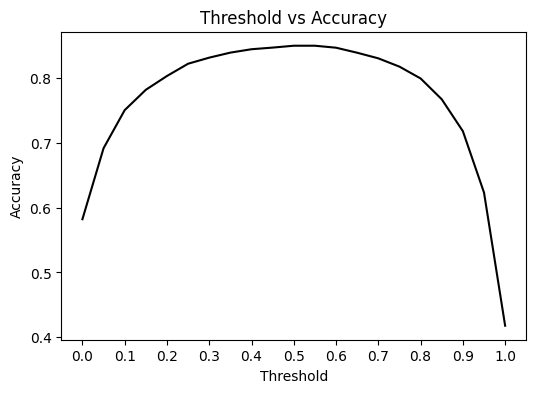

In [1114]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color="black")

plt.title("Threshold vs Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

plt.xticks(np.linspace(0, 1, 11))

plt.show()

In [1115]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
accuracy_score(baseline, y_val)

0.41782428287930723

The baseline accuracy is 42%, so the model we built is much better. Metrics that we can use to measure the quallity of a model are based on the confusion table.

We got the accuracy for our model, now let's get the confusion matrix.

In [1116]:
threshold = 0.5
predict_depression = (y_pred >= threshold)
predict_no_depression = (y_pred < threshold)
 
actual_depression = (y_val == 1)
actual_no_depression = (y_val == 0)
 
true_positive = (predict_depression & actual_depression).sum()
false_positive = (predict_depression & actual_no_depression).sum()
 
false_negative = (predict_no_depression & actual_depression).sum()
true_negative = (predict_no_depression & actual_no_depression).sum()

confusion_table = np.array(
 [[true_negative, false_positive],
 [false_negative, true_positive]]
)

In [1117]:
confusion_table

array([[1832,  484],
       [ 348, 2879]])

In [1118]:
confusion_table / confusion_table.sum()

array([[0.33050695, 0.08731734],
       [0.06278189, 0.51939383]])

The number of false positives (upper right) and false negatives (lower left) are low, so the model doesn't make many mistakes.

Let's get precision and recall from the values of the confusion table to help us understand the quality of the model in cases of class imbalance.

In [1119]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(np.float64(0.856080880166518), np.float64(0.8921599008366904))

The precision of a model tells us how many of the positive predictions turned out to be correct. 86% is good.

Recall is the fraction of correctly classified positive examples among all positive examples. 89% is good.

Precision and recall only work with binary predictions, let's use ROC AUC to evaluate the performance of our model since it can be used for other scenarios.

In [1120]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)

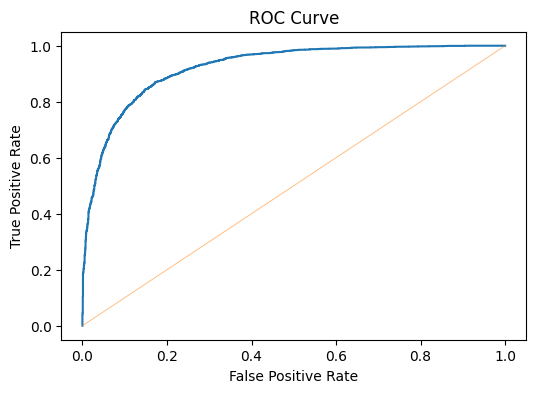

In [1121]:
plt.figure(figsize=(6, 4))

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], lw=0.7, alpha=0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

plt.show()

In [1122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

np.float64(0.9236856499537313)

The ROC Curve plot and the ROC AUC score both look good, so all of the metrics we used look good. Now we can test the model using new students.

## Step 6: Deployment

Let's make a function to encode each student that we want to test the model with.

In [1123]:
def encode_dataframe_student(df_student, target_variable):
    df_encoded = pd.get_dummies(df_student, columns=categorical_one_hot_encoding)

    for category in categorical_target_encoding:
        category_means = df_train_full.groupby(category)[target_variable].mean()
        df_encoded[category] = df[category].map(category_means)

    for column in pd.get_dummies(df_train, columns=categorical_one_hot_encoding).columns:
        if column not in df_encoded:
            df_encoded[column] = False

    # so that the columns are in order
    df_encoded = df_encoded[X_train.columns]
    
    return df_encoded

In [1124]:
student = {
    "gender": "male",
    "age": 25,
    "city": "jaipur",
    "academic_pressure": 3,
    "cgpa": 8.65,
    "study_satisfaction": "4",
    "sleep_duration": "5-6_hours",
    "dietary_habits": "healthy",
    "degree": "m.tech",
    "have_you_ever_had_suicidal_thoughts_?": 0,
    "work/study_hours": 6,
    "financial_stress": 2,
    "family_history_of_mental_illness": 0,
    "depression": 0
}

df_student = pd.DataFrame([student])
X_student = encode_dataframe_student(df_student, "depression")
model.predict_proba(X_student)[0, 1]

np.float64(0.06150976209738967)

The first student is a regular student, with a low chance of depression (6%).

In [1125]:
student = {
    "gender": "male",
    "age": 25,
    "city": "jaipur",
    "academic_pressure": 3,
    "cgpa": 8.65,
    "study_satisfaction": "4",
    "sleep_duration": "5-6_hours",
    "dietary_habits": "healthy",
    "degree": "m.tech",
    "have_you_ever_had_suicidal_thoughts_?": 1,
    "work/study_hours": 6,
    "financial_stress": 2,
    "family_history_of_mental_illness": 0,
    "depression": 1
}

df_student = pd.DataFrame([student])
X_student = encode_dataframe_student(df_student, "depression")
model.predict_proba(X_student)[0, 1]

np.float64(0.4395826642181764)

The next student is identical to the first student, but has had suicidal thoughts before so his chance of depression is much higher (44%).

In [1126]:
student = {
    "gender": "male",
    "age": 25,
    "city": "jaipur",
    "academic_pressure": 3,
    "cgpa": 8.65,
    "study_satisfaction": "4",
    "sleep_duration": "more_than_8_hours",
    "dietary_habits": "healthy",
    "degree": "m.tech",
    "have_you_ever_had_suicidal_thoughts_?": 1,
    "work/study_hours": 6,
    "financial_stress": 2,
    "family_history_of_mental_illness": 0,
    "depression": 0
}

df_student = pd.DataFrame([student])
X_student = encode_dataframe_student(df_student, "depression")
model.predict_proba(X_student)[0, 1]

np.float64(0.3806201334510278)

This student is identical to the second student, but sleeps more so his chance of depression is lower (38%).

In [1127]:
student = {
    "gender": "female",
    "age": 22,
    "city": "jaipur",
    "academic_pressure": 4,
    "cgpa": 8.65,
    "study_satisfaction": 2,
    "sleep_duration": "5-6_hours",
    "dietary_habits": "unhealthy",
    "degree": "m.tech",
    "have_you_ever_had_suicidal_thoughts_?": 1,
    "work/study_hours": 2,
    "financial_stress": 4,
    "family_history_of_mental_illness": 0,
    "depression": 1
}

df_student = pd.DataFrame([student])
X_student = encode_dataframe_student(df_student, "depression")
model.predict_proba(X_student)[0, 1]

np.float64(0.9620215056995823)

This student has high academic_pressure, low study_satisfaction, sleeps few hours, eats unhealthy food, has had suicidal thoughts, and has high financial stress, so it makes sense that their chance of depression is very high (96%).

With the students that we tested the model with, it seems like we have a nice model.